# Consumer Price Index Analysis

This notebook provides a comprehensive analysis of the CPI dataset before model training, including:
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis
- Feature Engineering
- Model Training and Evaluation

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

## 1. Data Loading and Initial Exploration

In [2]:
# Load the dataset
import pandas as pd

df = pd.read_csv('C:\\intern proj\\data.csv')

# Display basic information
print('Dataset shape:', df.shape)
print('\nSample data:\n', df.head())
print('\nMissing values:\n', df.isnull().sum())

Dataset shape: (369, 30)

Sample data:
         Sector  Year     Month  Cereals and products  Meat and fish    Egg  \
0        Rural  2013   January                 107.5          106.3  108.1   
1        Urban  2013   January                 110.5          109.1  113.0   
2  Rural+Urban  2013   January                 108.4          107.3  110.0   
3        Rural  2013  February                 109.2          108.7  110.2   
4        Urban  2013  February                 112.9          112.9  116.9   

   Milk and products  Oils and fats  Fruits  Vegetables  ...  Housing  \
0              104.9          106.1   103.9       101.9  ...      NaN   
1              103.6          103.4   102.3       102.9  ...    100.3   
2              104.4          105.1   103.2       102.2  ...    100.3   
3              105.4          106.7   104.0       102.4  ...      NaN   
4              104.0          103.5   103.1       104.9  ...    100.4   

   Fuel and light  Household goods and services  Hea

## 2. Univariate Analysis

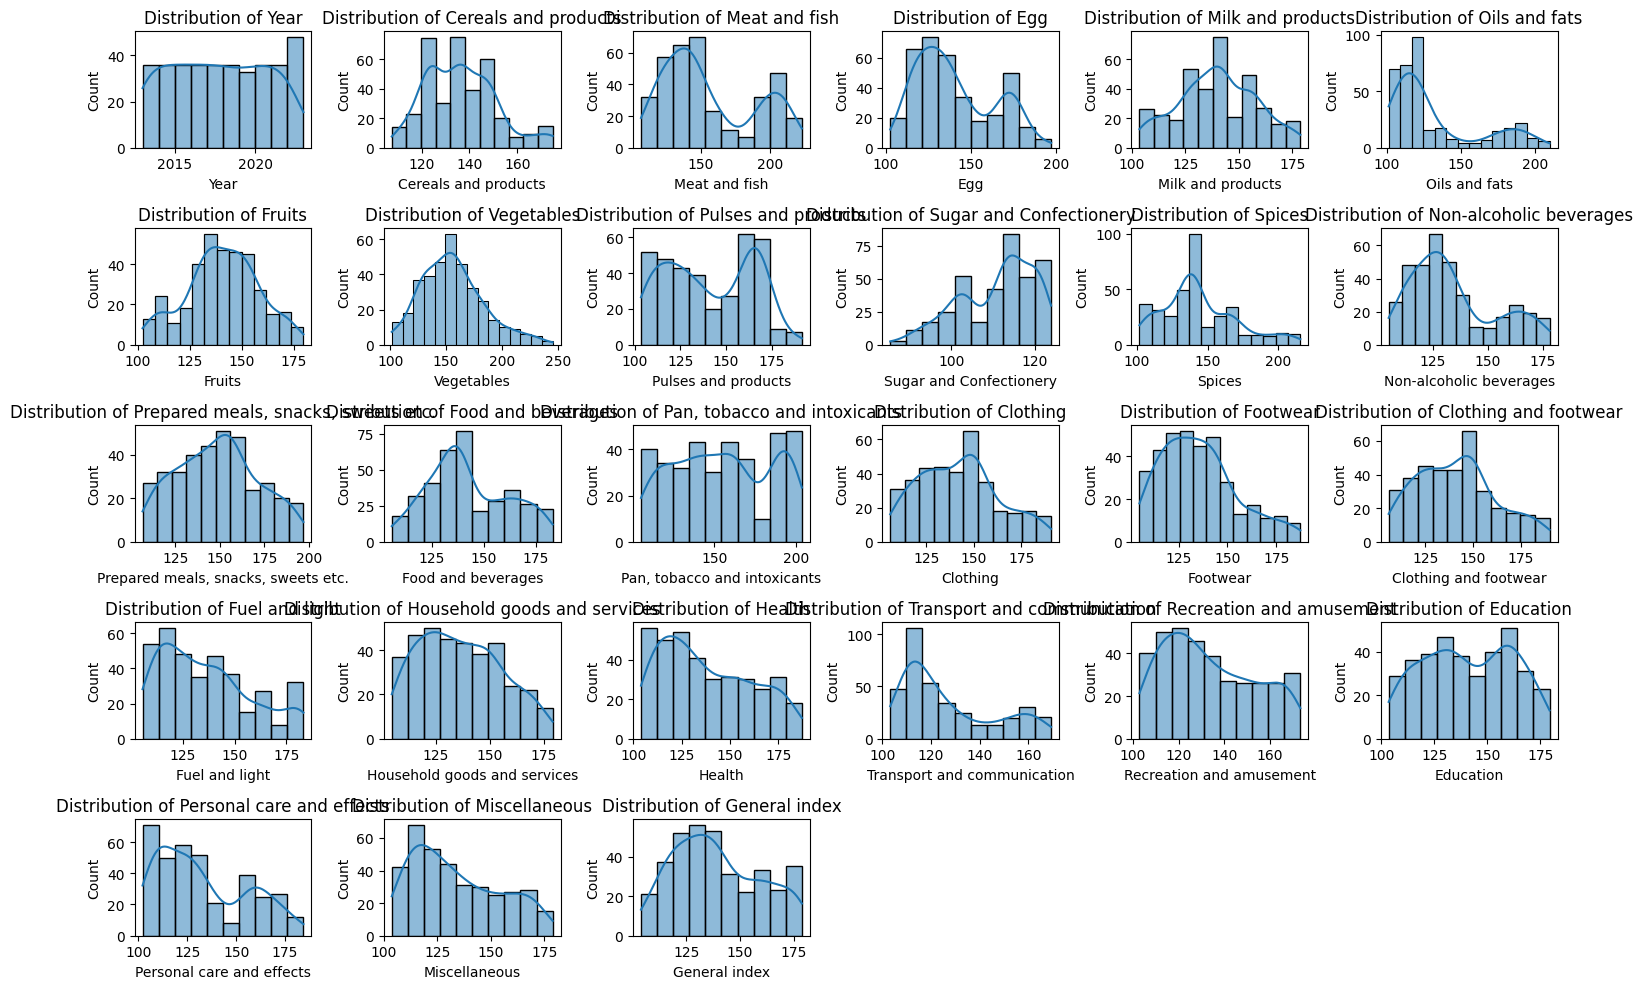

In [3]:
# Plot distributions of numerical features
plt.figure(figsize=(15, 10))

# Get only existing numerical columns
numerical_features = df.select_dtypes(include='number').columns

# Calculate grid size based on number of features
num_features = len(numerical_features)
rows = (num_features // 6) + 1
cols = min(num_features, 6)

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()

## 3. Bivariate Analysis

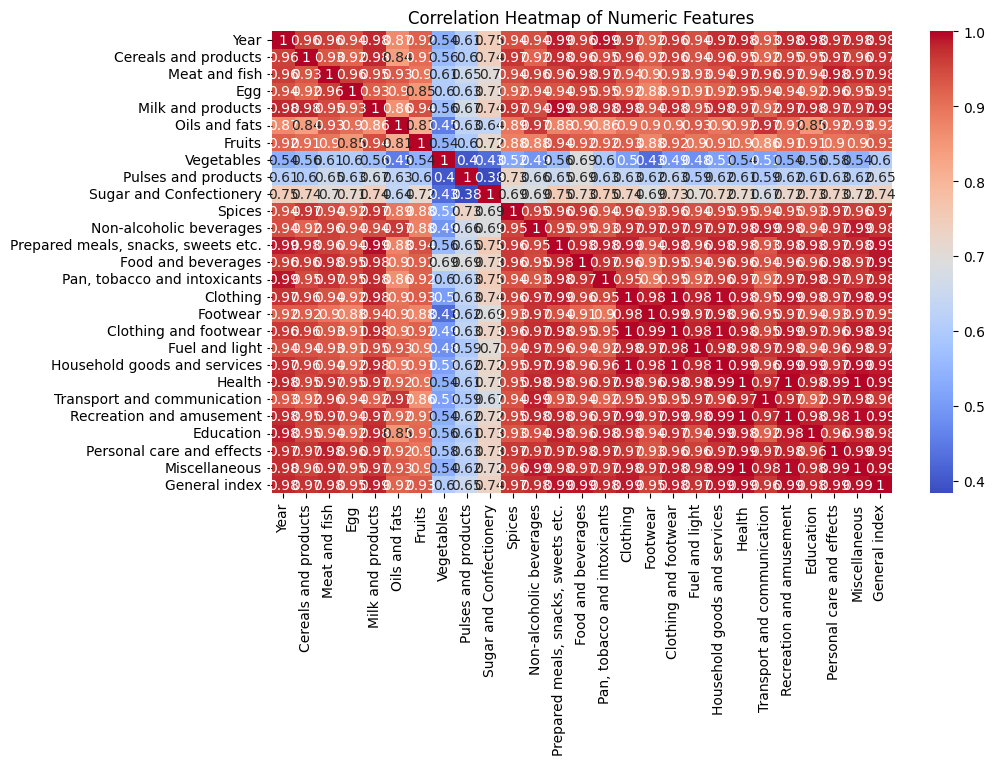

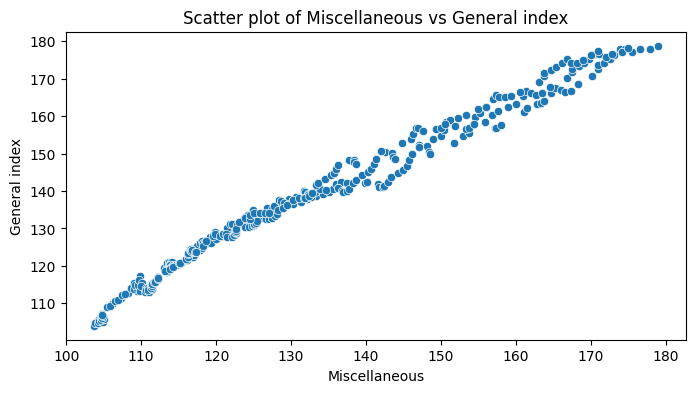

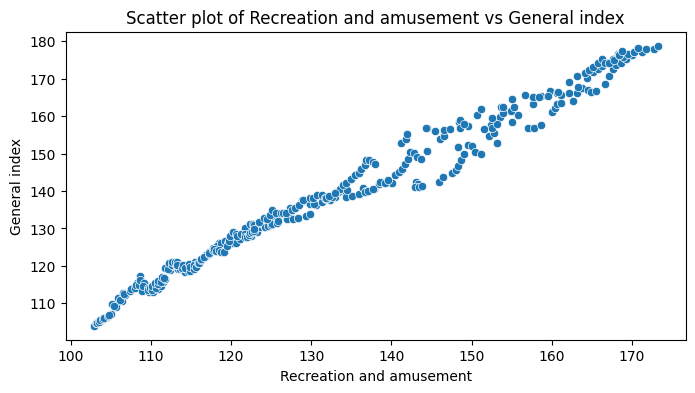

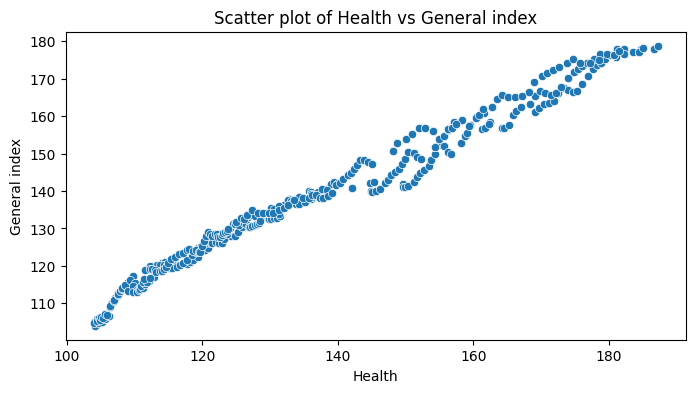

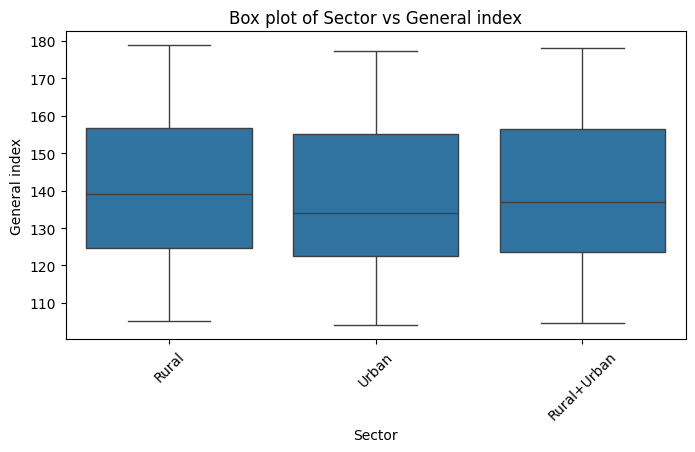

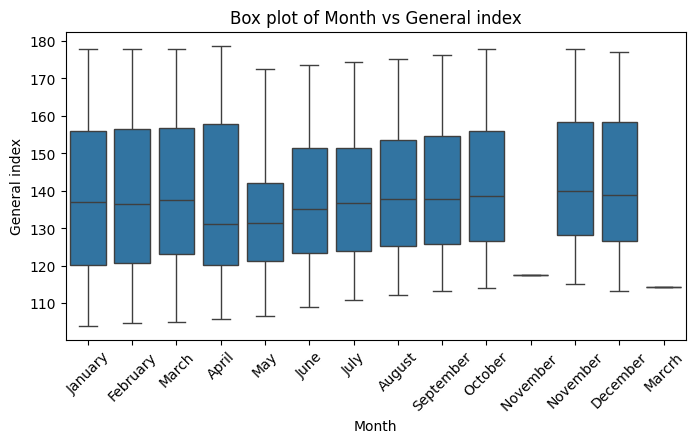

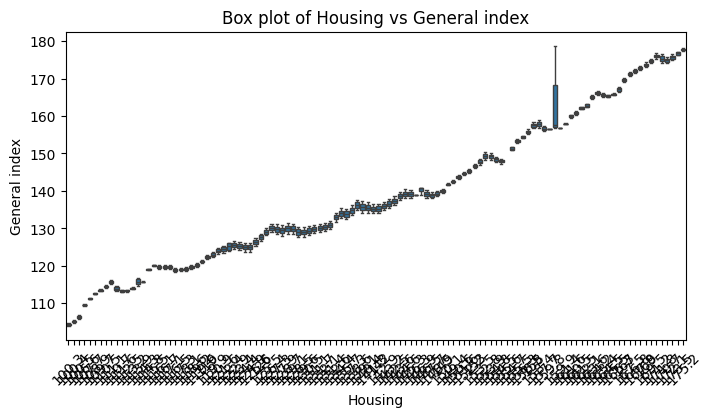

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('C:\\intern proj\\data.csv')

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

# 1. Correlation Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# 2. Scatter plots for top correlated features with target
correlations = df[numeric_cols].corr()['General index'].sort_values(ascending=False)
top_corr = correlations.index[1:4]  # Get top 3 correlated features

for feature in top_corr:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=feature, y='General index', data=df)
    plt.title(f'Scatter plot of {feature} vs General index')
    plt.show()

# 3. Box plots for categorical features vs target
for cat_col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=cat_col, y='General index', data=df)
    plt.title(f'Box plot of {cat_col} vs General index')
    plt.xticks(rotation=45)
    plt.show()

## 4. Multivariate Analysis

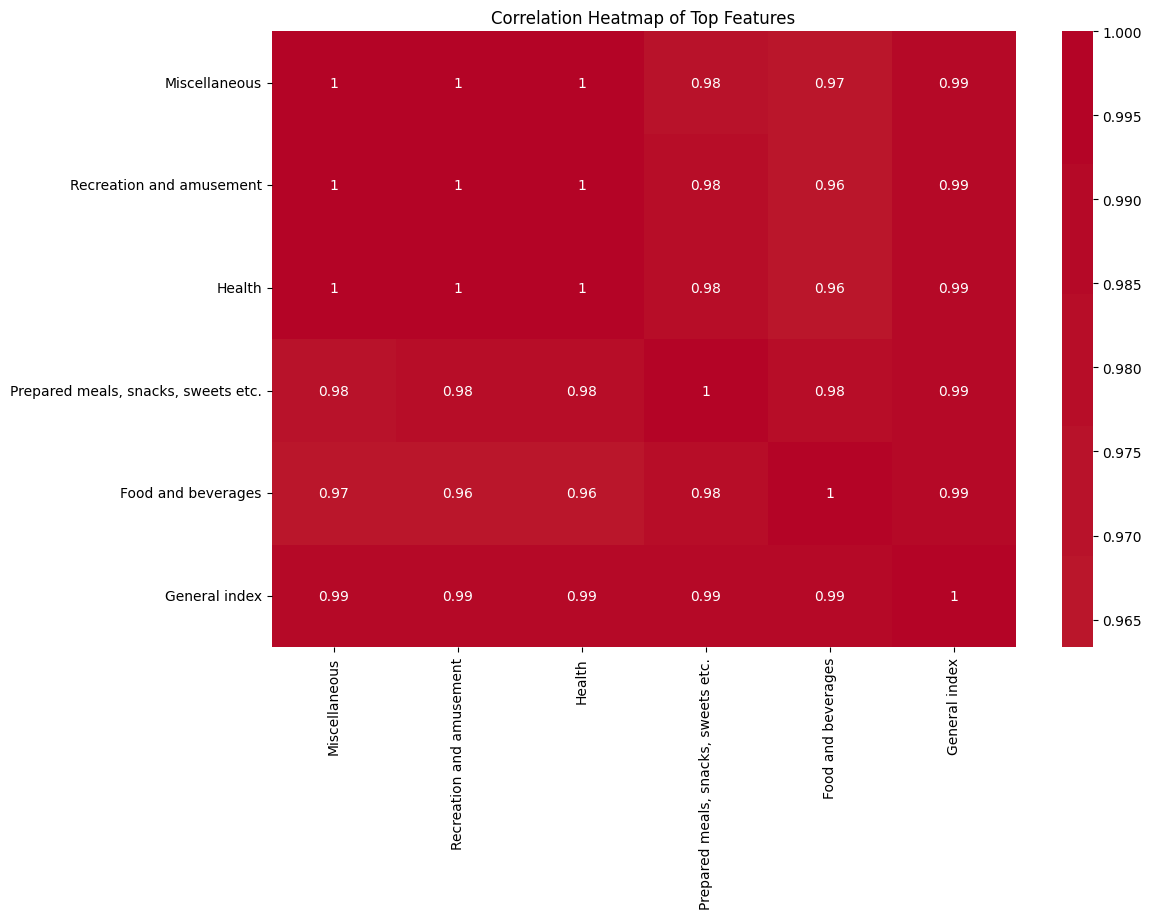

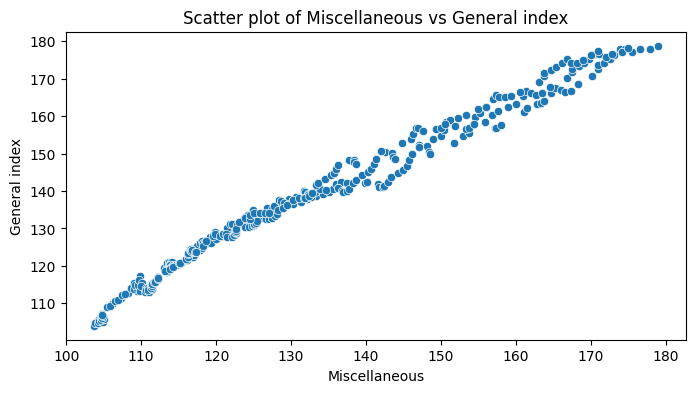

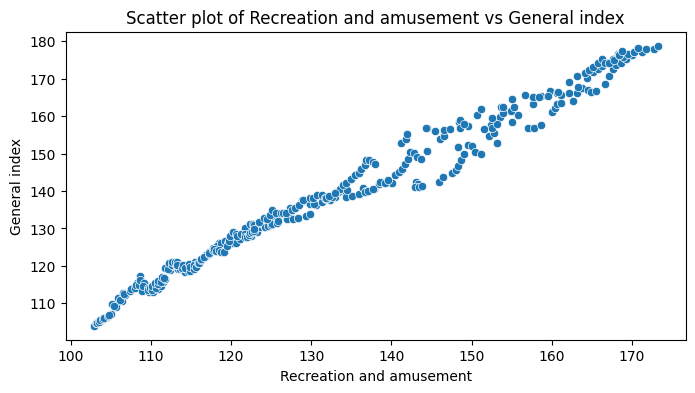

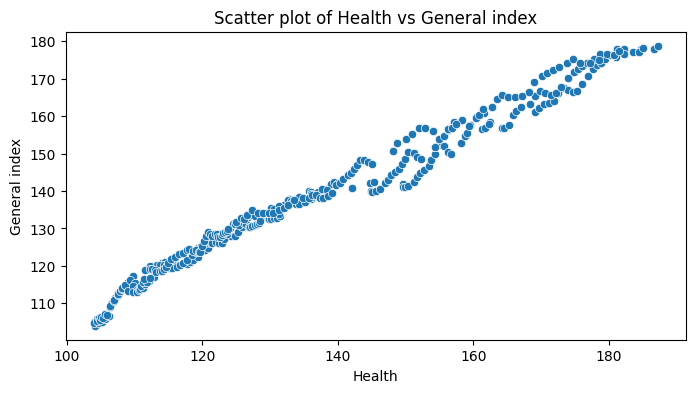

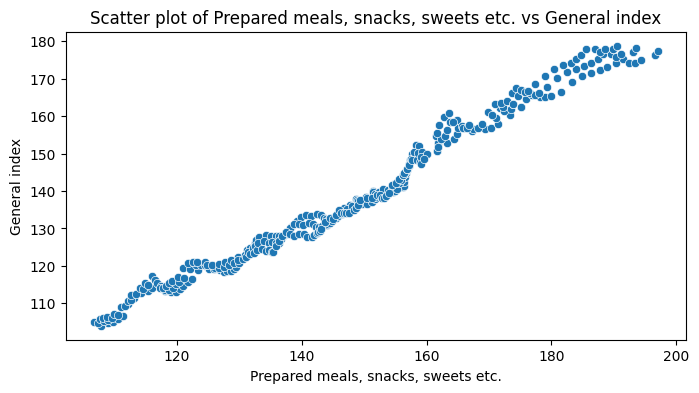

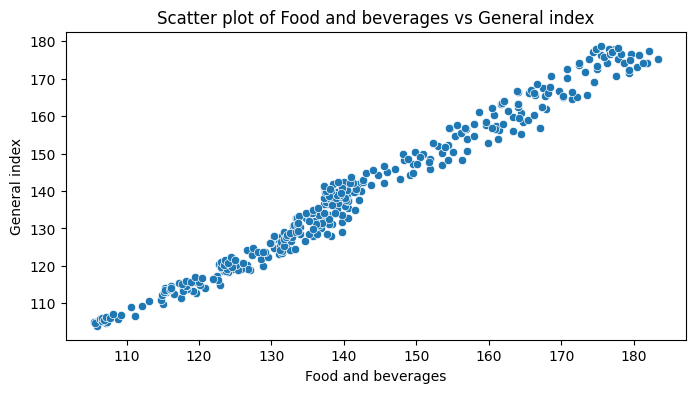

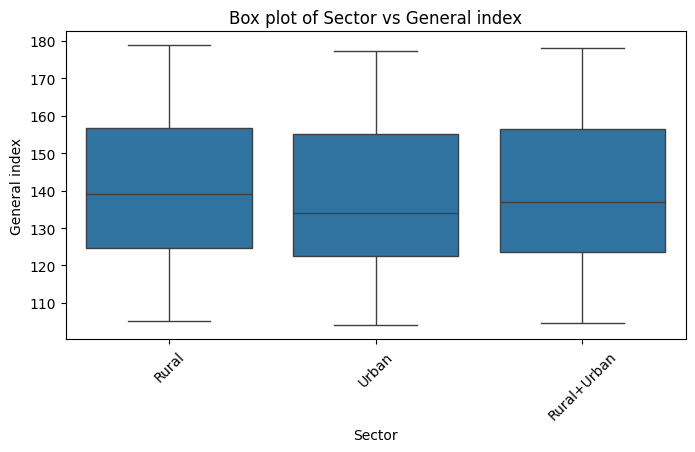

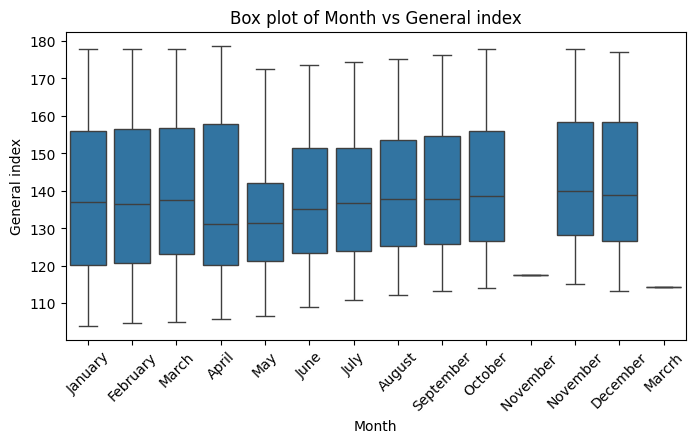

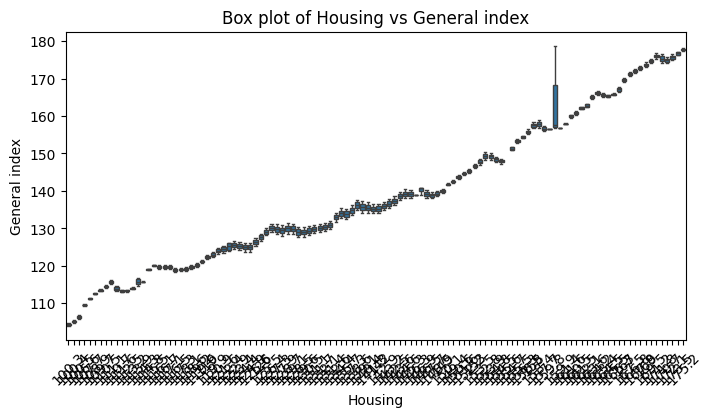

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('C:\\intern proj\\data.csv')

# Get numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calculate correlations with target
correlations = df[numeric_cols].corr()['General index'].sort_values(ascending=False)

# Get top 5 features (excluding General index itself)
top_features = correlations.index[1:6]

# 1. Correlation Heatmap of Top Features
plt.figure(figsize=(12, 8))
sns.heatmap(df[top_features.tolist() + ['General index']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Top Features')
plt.show()

# 2. Scatter plots for top correlated features with target
for feature in top_features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=feature, y='General index', data=df)
    plt.title(f'Scatter plot of {feature} vs General index')
    plt.show()

# 3. Box plots for categorical features vs target
categorical_cols = df.select_dtypes(exclude=[np.number]).columns
for cat_col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=cat_col, y='General index', data=df)
    plt.title(f'Box plot of {cat_col} vs General index')
    plt.xticks(rotation=45)
    plt.show()

## 5. Feature Engineering and Model Training

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('C:\\intern proj\\data.csv')

# Identify numeric columns to scale
numeric_cols = df.select_dtypes(include=[np.number]).columns
features_to_scale = numeric_cols.difference(['General index'])

# Handle non-numeric values by replacing '-' with NaN and then filling with mean
df[features_to_scale] = df[features_to_scale].replace('-', np.nan)
df[features_to_scale] = df[features_to_scale].astype(float)

# Fill NaN values with mean
for col in features_to_scale:
    df[col] = df[col].fillna(df[col].mean())

# Scale features
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Split data
X = df.drop(['General index', 'Sector'], axis=1)
y = df['General index']

# Now you can proceed with model training